In [26]:
#Lets first import all the nessessary libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings(action="ignore",category=FutureWarning)
warnings.filterwarnings(action="ignore",category=DeprecationWarning)

pd.pandas.set_option("display.max_rows",None)
pd.pandas.set_option("display.max_columns",None)

In [29]:
#Lets read the data in
df1=pd.read_csv ("LT_Processed_without_Outliers.csv")

In [30]:
df1.head()

,NewDCFlag,ColoReady At PlanReservationStart Flag,DeploymentSeverity,EngineeringGroup,PlanResourceTypeName,IsAddRack,IsFirstFootprint,IsNPI,PlanGEO,PlanIntentName,NumberOfRacks,NumberOfServers,PlanOrderPriorityName,PlanPropertyGroupName,Region,RegionGroup,RegionType,SKU Avaliable Flag,SKUCategoryName,CT Signal to LIve,CT Signal to Dock
0,True,missing,5.0,Azure,Compute,missing,False,False,Asia Pacific,Growth,20.0,800.0,99-ZZ No Priority,Azure Compute APAC,Southeast Asia,Not Restricted,Hero,0,PreRack,124.0,31.0
1,False,missing,5.0,Azure,Storage,missing,False,False,Asia Pacific,Growth,20.0,280.0,99-ZZ No Priority,Azure Storage APAC,Southeast Asia,Not Restricted,Hero,0,PreRack,126.0,42.0
2,True,missing,5.0,Azure,Compute,missing,False,False,Europe,Growth,20.0,800.0,99-ZZ No Priority,Azure Compute EMEA,West Europe,Not Restricted,Hero,0,PreRack,198.0,31.0
3,False,missing,5.0,Azure,XIO Compute,missing,False,False,United States,Growth,20.0,880.0,99-ZZ No Priority,Azure Compute US,West US,Not Restricted,Hub,0,PreRack,207.0,49.0
4,True,missing,5.0,Azure,Compute,missing,False,False,Europe,Growth,20.0,800.0,99-ZZ No Priority,Azure Compute EMEA,North Europe,Not Restricted,Hero,0,PreRack,221.0,31.0


In [4]:
#As per the observations in EDA, we are going to drop-IsMainstream,ProjectCategory,NewRegionFlag, since it contains a single catogory
df1.drop(["NewRegionFlag","IsMainstream","ProjectCategory"],axis=1,inplace=True)

In [31]:
#Since we already dealt with EDA and Feature Engineering, we will just check the summary
#Fuction to see the summary of the data
def summary_table(df):
    print(f"Dataset Shape: {df.shape}")
    #print("Total Columns in the Dataset:", df1.columns.nunique())
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing Values'] = df.isnull().sum().values
    summary['Uniques Values'] = df.nunique().values
  
    return summary

In [32]:
summary_table(df1)

Dataset Shape: (1070, 21)


,Name,dtypes,Missing Values,Uniques Values
0,NewDCFlag,bool,0,2
1,ColoReady At PlanReservationStart Flag,object,0,3
2,DeploymentSeverity,float64,0,4
3,EngineeringGroup,object,0,10
4,PlanResourceTypeName,object,0,71
5,IsAddRack,object,0,3
6,IsFirstFootprint,bool,0,2
7,IsNPI,bool,0,2
8,PlanGEO,object,0,22
9,PlanIntentName,object,0,10


In [7]:
#Expect DeploymentSeverity feature, all other are nominal. Only DeploymentSeverity is Ordinal 
#So lets use Lable encoder for DeploymentSeverity

d = {'missing':5,'high':2, 'medium':3,'low':4 }
df1["DeploymentSeverity"] = df1["DeploymentSeverity"].replace(d)

In [33]:
#Lest check the info
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 21 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   NewDCFlag                               1070 non-null   bool   
 1   ColoReady At PlanReservationStart Flag  1070 non-null   object 
 2   DeploymentSeverity                      1070 non-null   float64
 3   EngineeringGroup                        1070 non-null   object 
 4   PlanResourceTypeName                    1070 non-null   object 
 5   IsAddRack                               1070 non-null   object 
 6   IsFirstFootprint                        1070 non-null   bool   
 7   IsNPI                                   1070 non-null   bool   
 8   PlanGEO                                 1070 non-null   object 
 9   PlanIntentName                          1070 non-null   object 
 10  NumberOfRacks                           1070 non-null   floa

In [34]:
#Lest reset DataTypes of few Features(Convert Bool type as Object type)
bool_features_list= [feature for feature in df1.columns if df1[feature].dtype =="bool"]
add=["SKU Avaliable Flag","DeploymentSeverity"]
bool_features_list=bool_features_list+add

df1[bool_features_list] = df1[bool_features_list].astype('object')

In [35]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 21 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   NewDCFlag                               1070 non-null   object 
 1   ColoReady At PlanReservationStart Flag  1070 non-null   object 
 2   DeploymentSeverity                      1070 non-null   object 
 3   EngineeringGroup                        1070 non-null   object 
 4   PlanResourceTypeName                    1070 non-null   object 
 5   IsAddRack                               1070 non-null   object 
 6   IsFirstFootprint                        1070 non-null   object 
 7   IsNPI                                   1070 non-null   object 
 8   PlanGEO                                 1070 non-null   object 
 9   PlanIntentName                          1070 non-null   object 
 10  NumberOfRacks                           1070 non-null   floa

In [36]:
df1.describe()

,NumberOfRacks,NumberOfServers,CT Signal to LIve,CT Signal to Dock
count,1070.000000,1070.000000,1070.000000,1070.000000
mean,11.862617,267.491589,168.006542,75.107477
std,7.951373,247.972126,75.200443,41.090635
min,1.000000,2.000000,15.000000,0.000000
25%,3.000000,41.000000,113.000000,48.000000
50%,10.000000,198.000000,150.000000,66.000000
75%,20.000000,440.000000,217.000000,98.000000
max,40.000000,880.000000,400.000000,254.000000


In [37]:
df2=df1.copy()
df2=pd.get_dummies(df1, drop_first=True)

In [38]:
df2.head()

,NumberOfRacks,NumberOfServers,CT Signal to LIve,CT Signal to Dock,NewDCFlag_True,ColoReady At PlanReservationStart Flag_Yes,ColoReady At PlanReservationStart Flag_missing,DeploymentSeverity_3.0,DeploymentSeverity_4.0,DeploymentSeverity_5.0,EngineeringGroup_Azure Data Lake,EngineeringGroup_Azure Key Vault,EngineeringGroup_NonWebComm,EngineeringGroup_O365 Exchange,EngineeringGroup_O365 SharePoint,EngineeringGroup_SAP HANA,EngineeringGroup_Search,EngineeringGroup_Unassigned,EngineeringGroup_Xbox,PlanResourceTypeName_AKV,PlanResourceTypeName_ActiveDirectory,PlanResourceTypeName_BM CRAY CS MT,PlanResourceTypeName_BM CRAY CSIN,PlanResourceTypeName_BM CRAY CSIN MT,PlanResourceTypeName_BM CRAY GPU,PlanResourceTypeName_BM CRAY GPU MT,PlanResourceTypeName_BM CRAY GPU OPS,PlanResourceTypeName_BM CRAY IN CORE,PlanResourceTypeName_BM CRAY MT CORE,PlanResourceTypeName_BM CRAY MT OPS,PlanResourceTypeName_BM HSM,PlanResourceTypeName_BM NetApp,PlanResourceTypeName_BM SAP LI1,PlanResourceTypeName_BM SAP MSEE,PlanResourceTypeName_BM SAP Network,PlanResourceTypeName_BM SAP Storage,PlanResourceTypeName_BM SAP VLI,PlanResourceTypeName_BM VMW CS COMP1,PlanResourceTypeName_BM VMW CS COMP2,PlanResourceTypeName_BM VMW CS MSEE,PlanResourceTypeName_BM VMWare Comp,PlanResourceTypeName_BM VMWare Comp1,PlanResourceTypeName_BackEnd,PlanResourceTypeName_Compute,PlanResourceTypeName_Compute AI-GC,PlanResourceTypeName_Compute HPC Gen 6.0,PlanResourceTypeName_Compute HPC-HB,PlanResourceTypeName_Compute-FAST,PlanResourceTypeName_Compute-SPO,PlanResourceTypeName_Confidential Compute,PlanResourceTypeName_Cosmos,PlanResourceTypeName_Dedicated Compute,PlanResourceTypeName_FPGA Compute,PlanResourceTypeName_FPGA Compute6.0,PlanResourceTypeName_FrontEnd,PlanResourceTypeName_Fv2 Compute,PlanResourceTypeName_GPU Compute,PlanResourceTypeName_GPU Compute 6.2,PlanResourceTypeName_GPU Compute Gen 5.0,PlanResourceTypeName_GPU Compute Gen 6.0,PlanResourceTypeName_GPU Machine Learning,PlanResourceTypeName_GPU Remote Viz,PlanResourceTypeName_GPU Remote-Viz Gen 5.0,PlanResourceTypeName_GPU-v Compute Gen 5.0,PlanResourceTypeName_Game Streaming,PlanResourceTypeName_Godzilla,PlanResourceTypeName_HPC,PlanResourceTypeName_HPC-HBv2,PlanResourceTypeName_Lv2 Compute,PlanResourceTypeName_M-Series,PlanResourceTypeName_Mv2-Series,PlanResourceTypeName_One IM,PlanResourceTypeName_Passport - Compute,PlanResourceTypeName_PilotFish,PlanResourceTypeName_Remote Viz Gen7,PlanResourceTypeName_SQL Azure,PlanResourceTypeName_SQL Azure (DocDB),PlanResourceTypeName_SQLDW Local Storage,PlanResourceTypeName_Search,PlanResourceTypeName_Storage,PlanResourceTypeName_StorageFast,PlanResourceTypeName_XArchive HDD,PlanResourceTypeName_XDirect,PlanResourceTypeName_XIO Compute,PlanResourceTypeName_XIO Storage,PlanResourceTypeName_XTransport DBX,PlanResourceTypeName_Xarchive,PlanResourceTypeName_Xtransport,PlanResourceTypeName_ZRS Storage,IsAddRack_Yes,IsAddRack_missing,IsFirstFootprint_True,IsNPI_True,PlanGEO_Asia Pacific,PlanGEO_Brazil,PlanGEO_CANADA,PlanGEO_CHINA,PlanGEO_Canary (US),PlanGEO_Europe,PlanGEO_FRANCE,PlanGEO_Germany,PlanGEO_Germany Gov,PlanGEO_INDIA,PlanGEO_JAPAN,PlanGEO_Korea,PlanGEO_Norway,PlanGEO_South Africa,PlanGEO_Switzerland,PlanGEO_UAE,PlanGEO_USDoD,PlanGEO_USGov,PlanGEO_United Kingdom,PlanGEO_United Kingdom (GS),PlanGEO_United States,PlanIntentName_DecommPair,PlanIntentName_Growth,PlanIntentName_Pilot,PlanIntentName_Pilot-Prod,PlanIntentName_PilotSecondary,PlanIntentName_Reservation,PlanIntentName_Secondary,PlanIntentName_Test,PlanIntentName_Test-Prod,PlanOrderPriorityName_11-H1 Top Priority Hot,PlanOrderPriorityName_20-S0 Top Priority Strategic,PlanOrderPriorityName_21-S1 Strategic Initiative,"PlanOrderPriorityName_32-WM2 Storage Mitigate (STD,XIO,ZRS)",PlanOrderPriorityName_38-WM8 Other EG Mitigate,PlanOrderPriorityName_41-C1 Customer Commit,PlanOrderPriorityName_63-N3 NPI,PlanOrderPriorityName_99-ZZ No Priority,PlanPropertyGroupName_Azure Bare Metal Cray,PlanPropertyGroupName_Azure Bare 

In [39]:
#lets define our predictors and outcome (Target)
x=df2.drop(["CT Signal to LIve","CT Signal to Dock"],axis=1)
y=df2["CT Signal to LIve"]

In [40]:
#random_state is the seed used by the random number generator. It can be any integer.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=100)

In [41]:
import statsmodels.api as sm
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
x_train = sm.add_constant(x_train)
# create a fitted model in one line
lm = sm.OLS(y_train,x_train.astype(float))
lm_result=lm.fit()

In [42]:
# print the coefficients
print(lm_result.summary())

                            OLS Regression Results                            
Dep. Variable:      CT Signal to LIve   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     6.645
Date:                Thu, 09 Jul 2020   Prob (F-statistic):           4.42e-66
Time:                        16:13:52   Log-Likelihood:                -3892.8
No. Observations:                 749   AIC:                             8120.
Df Residuals:                     582   BIC:                             8891.
Df Model:                         166                                         
Covariance Type:            nonrobust                                         
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

In [43]:
# Making predictions using the model
y_pred_train = lm_result.predict(x_train)
y_pred_test = lm_result.predict(sm.add_constant(x_test))

In [44]:
# Lets evaluate our results (compairing y_test with the pred)
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [45]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
MAE_train = mean_absolute_error(y_train, y_pred_train)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
MAE_test = mean_absolute_error(y_test, y_pred_test)

In [46]:
print('rmse_train :',rmse_train, 'MAE_train', MAE_train)
print('rmse_test :',rmse_test, 'MAE_test', MAE_test)

rmse_train : 43.74376116692851 MAE_train 31.0780483120588
rmse_test : 54.70115812383134 MAE_test 39.176874099551114


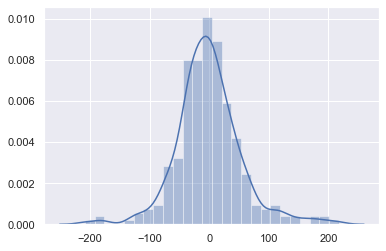

In [47]:
sns.distplot(y_test-y_pred_test)

In [48]:
## for feature slection

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [49]:
### Apply Feature Selection
# first, specify the Lasso Regression model,
# select a suitable alpha (equivalent of penalty).
# The bigger the alpha the less features that will be selected.

# Then I use the selectFromModel object from sklearn, which
# will select the features which coefficients are non-zero

feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(x_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [50]:
feature_sel_model.get_support()

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True, False, False,  True,  True,  True, False,
       False, False,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True, False,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True, False,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True, False,  True,
        True,  True,

In [54]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feat = x_train.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((x_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
#('features with coefficients shrank to zero: {}'.format(
    #np.sum(selected_feat.estimator_.coef_ == 0)))

total features: 224
selected features: 174


In [55]:
selected_feat

Index(['NumberOfRacks', 'NumberOfServers', 'NewDCFlag_True',
       'ColoReady At PlanReservationStart Flag_Yes',
       'ColoReady At PlanReservationStart Flag_missing',
       'DeploymentSeverity_3.0', 'DeploymentSeverity_4.0',
       'DeploymentSeverity_5.0', 'EngineeringGroup_Azure Data Lake',
       'EngineeringGroup_Azure Key Vault',
       ...
       'Region_West India', 'Region_West US', 'Region_West US 2',
       'RegionGroup_Restricted', 'RegionGroup_Unassigned',
       'RegionType_Satellite', 'SKU Avaliable Flag_1', 'SKUCategoryName_Rack',
       'SKUCategoryName_SAN', 'SKUCategoryName_Switch pair'],
      dtype='object', length=174)